## <center> Machine learning : Classification 

In [2]:
# import important libraries : 
import numpy as np
import matplotlib.pyplot as plt

## 1. Perceptron :

### 1.1 Theory : 

Let the training data $S = \{ (x_1, y_i) \}_{i=0}^{m}$, where $x_i \in \mathbb{R}^d$ and $y_i \in \{-1, 1\}$

<u><b>The purpose :</b></u> 

Is to find a classifier $h_s$, in the perceptron algorithm : 

$$ h_s(x) = sign(w^T.x) = \begin{cases}
                            \text{1, if $w^T.x > 0$} \\
                            \text{-1, if $w^T.x < 0$}
                        \end{cases}$$

> Note :
> 
> $w \in \mathbb{R}^{d+1}$, because we include the bias $w_0$, by including $1$ in sample $x = [1, x_1, ..., x_d ]$

Let define the Loss function, in classification problems, specially in Perceptron, we consider:

$$ ERM(S, w) = \sum_{i = 1}^{m} \mathbb{1}_{[h_s(x_i) \neq y_i]}(x_i)$$

where the $\mathbb{1}$ function defined as : 

$$ \mathbb{1}_{[h_s(x) \neq y]}(x)  = \begin{cases}
                                        \text{1,  if $h_s(x) \neq y$} \\
                                        \text{0,  if $h_s(x) = y$}
                                    \end{cases}$$

### 1.2 prepare data : 

In [3]:
sep_data = np.loadtxt("./sep_data.csv", delimiter=',')

In [4]:
X_train, y_train = sep_data[:, :-1], sep_data[:, -1]

In [5]:
X_train[:10]

array([[1.        , 5.56755988, 6.22992502],
       [1.        , 2.85008898, 1.75119824],
       [1.        , 1.79074318, 2.96115958],
       [1.        , 7.0824643 , 6.62574582],
       [1.        , 1.92239567, 0.91431743],
       [1.        , 5.15890362, 5.56996509],
       [1.        , 2.45192085, 2.18743356],
       [1.        , 2.57946292, 2.60054841],
       [1.        , 0.386485  , 1.50348458],
       [1.        , 5.71250619, 5.91346478]])

In [6]:
# print the X_train shape : 
X_train.shape

(240, 3)

The `X_train` has two features, the first column is added just for include the intercept in $w$ weights.

In [7]:
y_train

array([ 1., -1., -1.,  1., -1.,  1., -1., -1., -1.,  1., -1.,  1., -1.,
        1.,  1.,  1.,  1., -1.,  1., -1.,  1., -1.,  1.,  1.,  1.,  1.,
        1.,  1., -1.,  1., -1.,  1.,  1.,  1., -1., -1.,  1., -1., -1.,
       -1., -1., -1., -1., -1.,  1., -1., -1.,  1.,  1.,  1.,  1., -1.,
       -1.,  1., -1.,  1.,  1.,  1.,  1.,  1., -1., -1.,  1., -1., -1.,
        1.,  1., -1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,
        1., -1., -1., -1.,  1., -1., -1.,  1., -1.,  1., -1.,  1.,  1.,
       -1.,  1.,  1.,  1.,  1., -1.,  1., -1., -1., -1.,  1.,  1., -1.,
        1.,  1.,  1., -1.,  1., -1., -1., -1., -1.,  1.,  1.,  1., -1.,
        1., -1., -1.,  1., -1., -1., -1., -1.,  1., -1.,  1.,  1.,  1.,
       -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,
        1.,  1.,  1.,  1., -1., -1., -1., -1., -1., -1.,  1.,  1., -1.,
       -1., -1., -1.,  1., -1.,  1.,  1.,  1., -1., -1., -1., -1.,  1.,
        1.,  1.,  1., -1.,  1.,  1., -1., -1.,  1., -1.,  1., -1

### 1.3 Visualize data : 

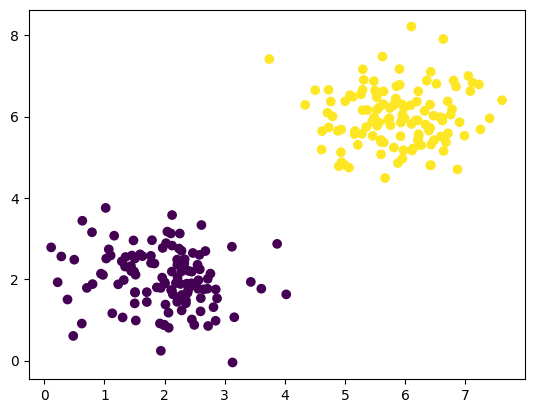

In [8]:
plt.scatter(X_train[:, 1], X_train[:, 2], marker="o", c=y_train)

### 1.4 Build model : 

In [18]:
class Perceptron:
    
    def __init__(self, name ="Perceptron"):

        self.w : np.ndarray 
        self.lossHist : list = []
        self.name = name
        self.ls : float

    def fit(self, X, y):
        m , d = X.shape
        self.w = np.random.rand(d)
        
        self.lossHist.append(self.loss(X, y))

        self.ls = self.loss(X, y)

        t = 0
        
        while(self.ls != 0):
            for i, xi in enumerate(X):
                if self.hs(xi)*y[i] < 0: 
                    self.w += y[i] * xi
                    self.ls = self.loss(X, y)

                t += 1                
                if t%10 ==0:
                    self.lossHist.append(self.ls)
                    print(f"iter : {t} ,loss : {self.ls}")
                    if self.ls == 0: break
    
    def predict(self, x):
        return self.hs(x)
                
    def loss(self, X, y):
        return (1/len(X)) * sum(0 if self.hs(xi) == y[i] else 1 for i, xi in enumerate(X))

    def hs(self, xi):
        return np.sign(self.w @ xi)

    def summary(self):
        print(f"======== {self.name} model summary : ", "="*50)
        print(f" weights : {self.w}")
        print(f" loss : {self.ls}")
        print(f"\nplot the loss : ")
        plt.plot(range(0, len(self.lossHist)), self.lossHist) 

In [19]:
# create perceptron model
per = Perceptron()

In [20]:
# train Perceptron model :
per.fit(X_train, y_train)

iter : 10 ,loss : 0.5
iter : 20 ,loss : 0.45
iter : 30 ,loss : 0.48333333333333334
iter : 40 ,loss : 0.08333333333333333
iter : 50 ,loss : 0.325
iter : 60 ,loss : 0.4875
iter : 70 ,loss : 0.05416666666666667
iter : 80 ,loss : 0.05416666666666667
iter : 90 ,loss : 0.05416666666666667
iter : 100 ,loss : 0.05416666666666667
iter : 110 ,loss : 0.5
iter : 120 ,loss : 0.46249999999999997
iter : 130 ,loss : 0.4791666666666667
iter : 140 ,loss : 0.016666666666666666
iter : 150 ,loss : 0.016666666666666666
iter : 160 ,loss : 0.016666666666666666
iter : 170 ,loss : 0.016666666666666666
iter : 180 ,loss : 0.016666666666666666
iter : 190 ,loss : 0.016666666666666666
iter : 200 ,loss : 0.016666666666666666
iter : 210 ,loss : 0.016666666666666666
iter : 220 ,loss : 0.016666666666666666
iter : 230 ,loss : 0.0


> **Note** :
> 
>$w = [w_0, w_1, w_2]$  where the $w_0$ is the intercept.

In [21]:
# print the weigth of the perceptron model : 
per.w 

array([-17.74798997,   1.93014555,   2.62033819])

======== Perceptron model summary :  ==================================================
 weights : [-17.74798997   1.93014555   2.62033819]
 loss : 0.0

plot the loss : 


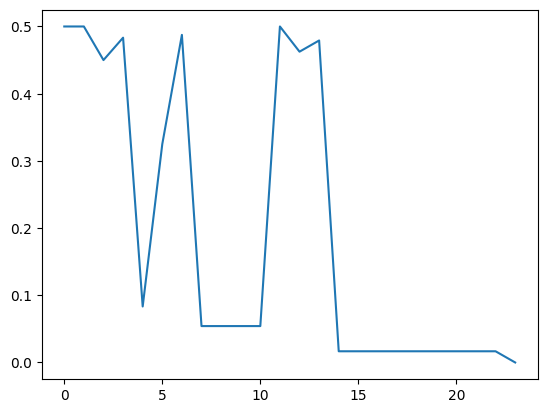

In [22]:
per.summary()

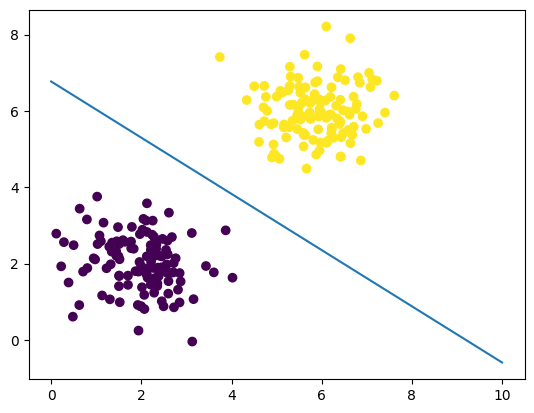

In [23]:
t = np.linspace(0, 10, 100)
y_line = - (per.w[0] + t * per.w[1])/per.w[2] 
plt.scatter(X_train[:, 1], X_train[:, 2], marker="o", c=y_train)
plt.plot(t, y_line)

## 2. Pocket :

> ### Note :
> The key distinction between the `Perceptron` model and the `Pocket` model lies in their convergence behavior. Unlike the `Pocket` algorithm, the `Perceptron` algorithm may fail to converge when confronted with non-linearly separable data. The basic concept involves a straightforward modification: instead of checking if $ERM(S, w) = 0$ for convergence, the algorithm iterates for a predetermined number of iterations, denoted as $T_{\text{max}}$, serving as a hyperparameter.

### 2.1 prepare data : 

The data is non linear separated, that the raison why we use the pocket algorithm because will never loss function will get 0.

In [24]:
nsep_data = np.loadtxt("./nosep_data.csv", delimiter=',')

In [25]:
X_train_nsp, y_train_nsp = nsep_data[:, :-1], nsep_data[:, -1]

In [26]:
X_train_nsp[:10]

array([[ 1.        ,  3.47698034,  4.06660238],
       [ 1.        ,  2.29322   ,  0.45343146],
       [ 1.        ,  0.84687286,  0.25574531],
       [ 1.        ,  7.43693863,  5.72436066],
       [ 1.        ,  2.11487051,  1.98998132],
       [ 1.        ,  7.72220958,  4.68074359],
       [ 1.        ,  6.09117215,  8.41329927],
       [ 1.        ,  1.36778353,  2.42936182],
       [ 1.        ,  2.43714889, -0.44234708],
       [ 1.        ,  0.86986525,  1.70759329]])

In [27]:
y_train_nsp

array([ 1., -1., -1.,  1., -1.,  1.,  1., -1., -1., -1., -1.,  1., -1.,
        1., -1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1.,
        1., -1.,  1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.,
       -1., -1.,  1., -1., -1.,  1.,  1., -1., -1.,  1., -1., -1., -1.,
        1., -1.,  1., -1., -1.,  1., -1.,  1., -1., -1., -1., -1.,  1.,
        1., -1., -1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1., -1.,
       -1.,  1.,  1., -1., -1.,  1., -1., -1.,  1.,  1.,  1., -1., -1.,
        1., -1.,  1.,  1., -1.,  1.,  1., -1.,  1., -1.,  1., -1.,  1.,
       -1.,  1.,  1., -1.,  1., -1.,  1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1.,  1., -1., -1., -1., -1.,  1., -1.,  1.,  1.,  1.,
        1., -1., -1.,  1., -1.,  1., -1.,  1.,  1.,  1.,  1., -1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1., -1.,  1., -1.,  1.,  1., -1.,  1.,
       -1., -1.,  1.,  1.,  1., -1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1., -1., -1.,  1., -1., -1., -1., -1., -1.,  1

### 2.2 Visualise data : 

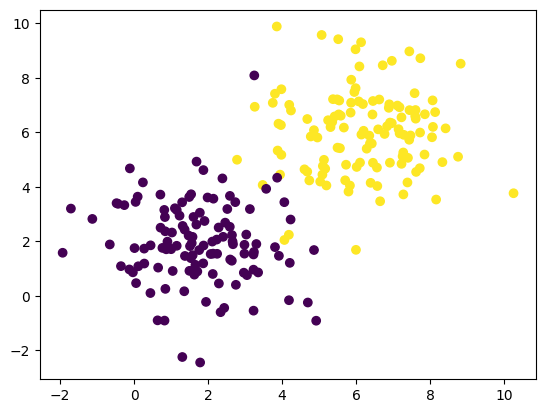

In [28]:
plt.scatter(X_train_nsp[:, 1], X_train_nsp[:, 2], marker="o", c=y_train_nsp)

### 2.3 Build Pocket Model : 

In [33]:
class Pocket(Perceptron):

    def __init__(self, Tmax = 100):
        super(Pocket, self).__init__("Pocket")
        self.Tmax = Tmax
        
    def fit(self, X, y):
        m , d = X.shape
        self.w = np.random.rand(d)
        
        self.lossHist.append(self.loss(X, y))

        self.ls = self.loss(X, y)

        t = 0
        
        for j in range(self.Tmax):
            for i, xi in enumerate(X):
                if self.hs(xi)*y[i] < 0: 
                    self.w += y[i] * xi
                    self.ls = self.loss(X, y)

            t += 1                
            if t%10 ==0:
                self.lossHist.append(self.ls)
                print(f"iter : {t} ,loss : {self.ls}")

In [34]:
# Create Pocket model : 
pocket = Pocket(Tmax = 200)

In [35]:
# train Pocket modelwith no separated data :
pocket.fit(X_train_nsp, y_train_nsp)

iter : 10 ,loss : 0.020833333333333332
iter : 20 ,loss : 0.025
iter : 30 ,loss : 0.020833333333333332
iter : 40 ,loss : 0.029166666666666667
iter : 50 ,loss : 0.025
iter : 60 ,loss : 0.03333333333333333
iter : 70 ,loss : 0.025
iter : 80 ,loss : 0.0375
iter : 90 ,loss : 0.025
iter : 100 ,loss : 0.03333333333333333
iter : 110 ,loss : 0.020833333333333332
iter : 120 ,loss : 0.029166666666666667
iter : 130 ,loss : 0.0375
iter : 140 ,loss : 0.020833333333333332
iter : 150 ,loss : 0.025
iter : 160 ,loss : 0.029166666666666667
iter : 170 ,loss : 0.029166666666666667
iter : 180 ,loss : 0.025
iter : 190 ,loss : 0.029166666666666667
iter : 200 ,loss : 0.029166666666666667


======== Pocket model summary :  ==================================================
 weights : [-103.91495781   18.7459075    13.10430162]
 loss : 0.029166666666666667

plot the loss : 


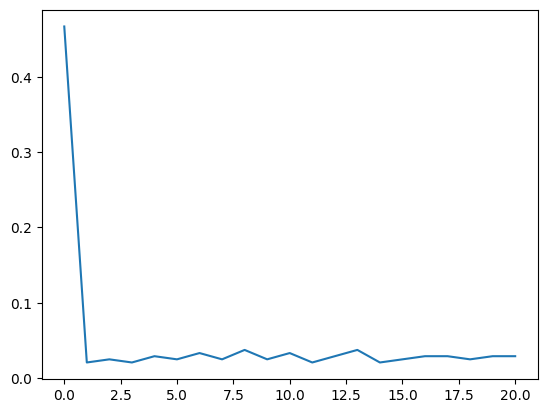

In [36]:
pocket.summary()

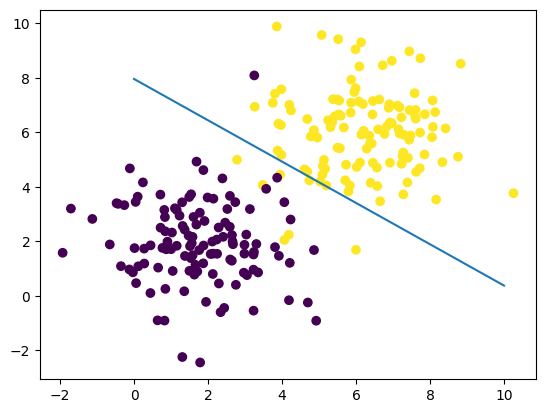

In [348]:
t = np.linspace(0, 10, 100)
y_line = - (per.w[0] + t * per.w[1])/per.w[2] 
plt.scatter(X_train_nsp[:, 1], X_train_nsp[:, 2], marker="o", c=y_train_nsp)
plt.plot(t, y_line)

## ADALINE : 

### Prepare data

> ### NOTE :
> For Adaline model we will use the same data as Pocket model

### Visualize data : 

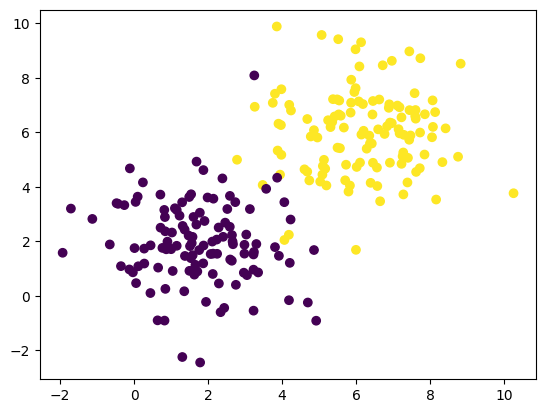

In [37]:
plt.scatter(X_train_nsp[:, 1], X_train_nsp[:, 2], marker="o", c=y_train_nsp)

In [83]:
class Adaline(Perceptron):

    def __init__(self, eps = 0.2):
        super(Adaline, self).__init__("Adaline")
        self.eps = eps

    def loss(self, X, y):
        return (1/len(X)) * sum((y[i] - self.hs(xi))**2 for i, xi in enumerate(X))

    def grad(self, X, y):
        return (1/len(X)) * sum(2*xi*(y[i] - self.hs(xi)) for i, xi in enumerate(X))
        
    def fit(self, X, y):
        m , d = X.shape
        self.w = np.random.rand(d)
        
        self.lossHist.append(self.loss(X, y))

        self.ls = self.loss(X, y)

        t = 0

        while(np.linalg.norm(self.grad(X, y)) > self.eps):
            
            for i, xi in enumerate(X):
                ei = y[i] - self.hs(xi)
                if ei != 0: 
                    self.w += ei* xi
                    self.ls = self.loss(X, y)

                t += 1                
                if t%10 ==0:
                    self.lossHist.append(self.ls)
                    print(f"iter : {t} ,loss : {self.ls}")
            

In [84]:
ad = Adaline()

In [85]:
ad.fit(X_train_nsp, y_train_nsp)

iter : 10 ,loss : 1.0833333333333333
iter : 20 ,loss : 1.8666666666666667
iter : 30 ,loss : 1.8333333333333333
iter : 40 ,loss : 2.0
iter : 50 ,loss : 0.8833333333333333
iter : 60 ,loss : 0.6666666666666666
iter : 70 ,loss : 1.1
iter : 80 ,loss : 0.9333333333333333
iter : 90 ,loss : 1.4333333333333333
iter : 100 ,loss : 0.21666666666666667
iter : 110 ,loss : 1.2166666666666666
iter : 120 ,loss : 2.0
iter : 130 ,loss : 0.13333333333333333
iter : 140 ,loss : 0.13333333333333333
iter : 150 ,loss : 0.13333333333333333
iter : 160 ,loss : 0.7333333333333333
iter : 170 ,loss : 1.4666666666666666
iter : 180 ,loss : 0.31666666666666665
iter : 190 ,loss : 1.2333333333333334
iter : 200 ,loss : 0.4666666666666667
iter : 210 ,loss : 0.1
iter : 220 ,loss : 0.1
iter : 230 ,loss : 0.1
iter : 240 ,loss : 0.1
iter : 250 ,loss : 0.3333333333333333
iter : 260 ,loss : 1.4
iter : 270 ,loss : 0.11666666666666667
iter : 280 ,loss : 0.11666666666666667
iter : 290 ,loss : 0.11666666666666667
iter : 300 ,loss : 

======== Adaline model summary :  ==================================================
 weights : [-83.07309329  16.58229614   5.79371368]
 loss : 0.15

plot the loss : 


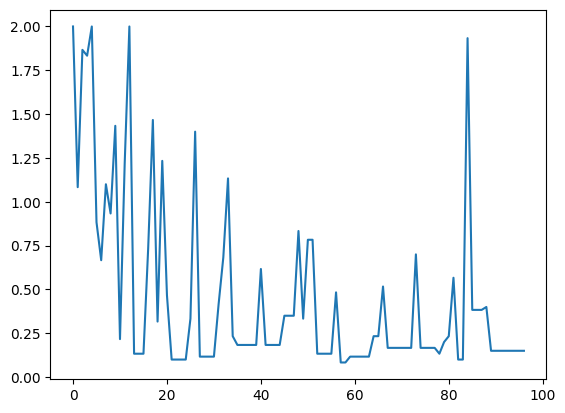

In [86]:
ad.summary()

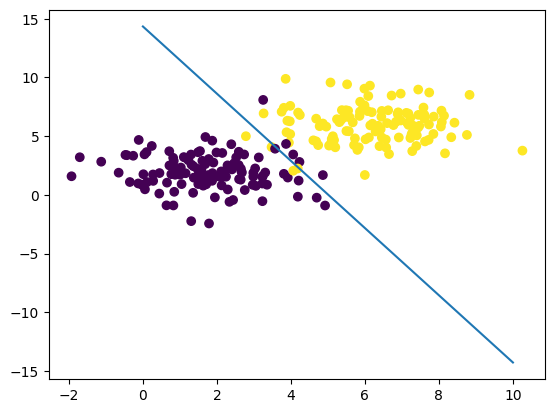

In [87]:
t = np.linspace(0, 10, 100)
y_line = - (ad.w[0] + t * ad.w[1])/ad.w[2] 
plt.scatter(X_train_nsp[:, 1], X_train_nsp[:, 2], marker="o", c=y_train_nsp)
plt.plot(t, y_line)

# VC Dimension : 

In [3]:
import numpy as np
import itertools

In [1]:
def create_combinations(n, arr):
    combinations = []

    def generate_combinations(i):
        if i == n:
            combinations.append(np.copy(arr))
            return

        arr[i][-1] = 0
        generate_combinations(i + 1)

        arr[i][-1] = 1
        generate_combinations(i + 1)

In [2]:
def shatter(classifier, data):
    all_combi = []
    X = np.copy(data)
    create_combi(len(X), X, 0, all_combi)
    all_combi = np.asarray(all_combi)
    MAX = all_combi.shape[0]

    for i in range(MAX):
        if all(all_combi[i][:, -1] == 0) or all(all_combi[i][:, -1] == 1):
            classifier.fit(all_combi[i][:, :-1], all_combi[i][:, -1])
            y_ = classifier.predict(all_combi[i][:, :-1])

            if not all(y_ == all_combi[i][:, -1]):
                return False

    return True

In [4]:
def VC_dimension(classifier, data):
    vc = 1

    for k in range(2, data.shape[0] + 1):
        A = list(itertools.combinations(data, k))
        i = 1
        
        for subset in A:
            if shatter(classifier, np.asarray(subset)):
                vc += 1
                break
            if i == len(A):
                return vc
        
            i += 1
    return vc
